In [71]:
# Script page for ASTRO 400B Project
# Currently no comments still testing and writing and thinking
# Tyler Baines
# Spring 2018

In [18]:
# Import Modules
import numpy as np
import astropy.units as u
import astropy.table as tbl
import matplotlib.pyplot as plt

%matplotlib inline
# Import my Modules
from Readfile import Read
#from GalaxyMass import ComponentMass
from FindFiles import FileFinder
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

In [12]:
Times = np.array([0.0, 4.79, 6.07, 10.3])
MW_files = FileFinder("MW", Times) 
M31_files = FileFinder("M31", Times)

Bulge_index = 3

In [13]:
print ("%s\n%s" % (MW_files, M31_files))


['MW_000', 'MW_335', 'MW_425', 'MW_721']
['M31_000', 'M31_335', 'M31_425', 'M31_721']


In [77]:
Snaps = np.array([0,335,425,721])
print (Snaps)

MW = MW_files[0].strip("_000")
M31 = MW_files[0].strip("_000")
print (MW)

R_array = np.geomspace(0.01,30, 50)

    

[  0 335 425 721]
MW


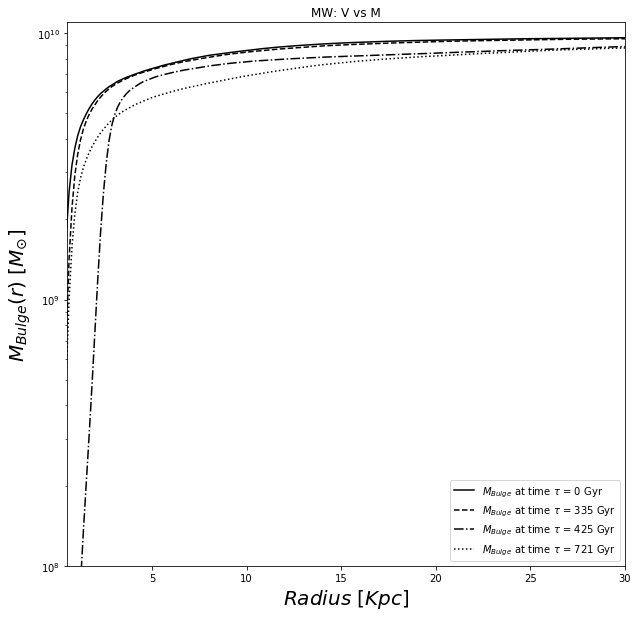

In [34]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
plt.title("MW: V vs M")
plt.xlabel("$Radius$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{Bulge}(r)$ $[M_{\odot}]$", fontsize = 20)
#plt.axis([0,30, 1e8, 1.1e10])
colors = ['black', 'red', 'blue', 'gold']
ls = ['-', '--', '-.', ':']
#plt.subplot(3,1,1)
for i in range(len(Snaps)):
    MW = MassProfile("MW", Snaps[i])
    MW_Mass_Bulge = MW.MassEnclosed(Bulge_index, R_array)
    #MW_Density_Bulge = 3*MW_Mass_Bulge/(4*np.pi*R_array**3)
    #MW_Velocity_Bulge = MW.CircularVelocity(Bulge_index, R_array)
    plt.axis([0.5,30, 1e8, 1.1e10]1
    plt.semilogy(R_array, MW_Mass_Bulge, color = 'black', ls = ls[i], \
                label = "$M_{Bulge}$ at time $\\tau$ = " + str(Snaps[i])+" Gyr")
    
plt.legend()    

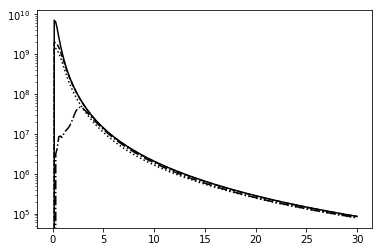

In [35]:
for i in range(len(Snaps)):
    MW = MassProfile("MW", Snaps[i])
    MW_Mass_Bulge = MW.MassEnclosed(Bulge_index, R_array)
    MW_Density_Bulge = 3*MW_Mass_Bulge/(4*np.pi*R_array**3)

    #plt.axis([0.5,30, 1e8, 1.1e10])
    plt.semilogy(R_array, MW_Density_Bulge, color = 'black', ls = ls[i], \
                label = "$M_{Bulge}$ at time $\\tau$ = " + str(Snaps[i])+" Gyr")

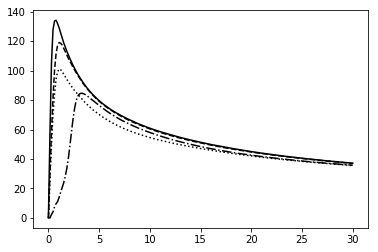

In [36]:
for i in range(len(Snaps)):
    MW = MassProfile("MW", Snaps[i])
    MW_Velocity_Bulge = MW.CircularVelocity(Bulge_index, R_array)

    plt.plot(R_array, MW_Velocity_Bulge, color = 'black', ls = ls[i], \
                label = "$M_{Bulge}$ at time $\\tau$ = " + str(Snaps[i])+" Gyr")

In [ ]:
MW = MassProfile("MW", Snaps[0])
MW_Mass_Bulge = MW.MassEnclosed(Bulge_index, R_array)

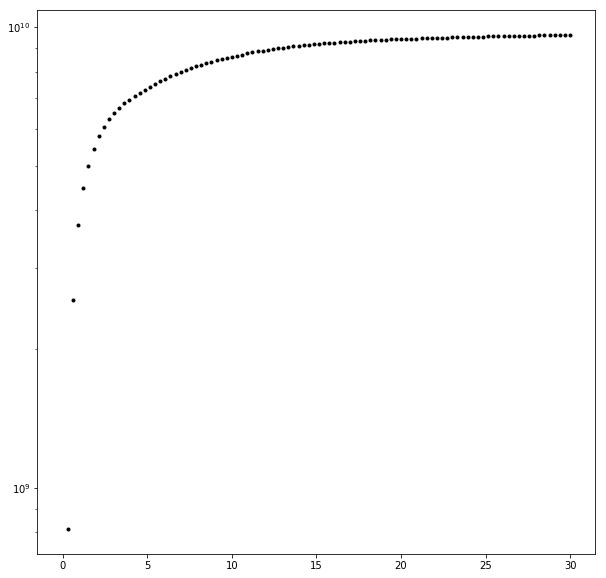

In [74]:
#print (MW_Mass_Bulge)
#print (R_array)
File = np.concatenate((R_array, MW_Mass_Bulge), axis = 0).reshape(2,len(R_array)).T

plt.figure(figsize=(10,10))
plt.semilogy(File[:,0], File[:,1], 'k.')
#print (File)

In [37]:
for jj in range(len(Snaps)):
    MW = MassProfile("MW", Snaps[i])
    MW_Mass_Bulge = MW.MassEnclosed(Bulge_index, R_array)
    File = np.concatenate(R_array, MW_Mass_Bulge, axis = 0)
    np.savetxt("MW_"+ str(Snaps[i]), File)

TypeError: Argument given by name ('axis') and position (2)

In [62]:
# Determine Re: The Half Mass Radius
def HalfMassRadius(Bmass,R,tot):
    # input, Bulge mass profile, Radius, Total Mass of Bulge
    # returns: Radius where mass is half the total mass 
  
    # half the total mass in units of 1e10
    HalfMass= tot/2.0/1e10
    
    # find where mass profile yields half the total mass 
    # note the use of "np.logical_and"   
    index = np.where( np.logical_and(Bmass/1e10 < (HalfMass+0.1), Bmass/1e10 > (HalfMass-0.1)))
 
    return R[index]

def Sersic_Model(Re,r,n,ML,Mtot,C):

    # luminosity
    L = Mtot/ML
    # Ie = L/7.2/pi/Re**2
    Ie = L/7.2/np.pi/Re**2
        
    return Ie*np.exp(-7.67*((r/Re)**(1.0/n)-C))

In [63]:
# For sersic Profile

#Determine Half Mass Radius for Bulge 
#Re = HalfMassRadius(BulgeMass['Bulge'],BulgeMass['R'],Btot)
#print(Re)



In [72]:
A = "M31_000"
print (A[:-4])

M31


In [71]:
filename = "MW_000"
path = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\\"+filename+".txt"
if filename[:-4] == "MW":
    print (path)

C:\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\MW_000.txt
